#Colab Setup

In [1]:
# This block is needed (only) for Colab
# If Colab: Click Runtime -> Change runtime type -> select Hardware accelerator: GPU
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.8 MB/s eta 0:00:00
Mounted at /content/gdrive


#Import

In [2]:
from fastai.tabular.all import *

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Data preparation

In [3]:
df = pd.read_csv('gdrive/MyDrive/Lab4/titanic.csv')
df.head()
#Pclass     Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survival   Survival (0 = No; 1 = Yes)
#name       Name
#sex        Sex
#age        Age
#sibsp      Number of Siblings/Spouses Aboard
#parch      Number of Parents/Children Aboard
#ticket     Ticket Number
#fare       Passenger Fare (British pound)
#cabin      Cabin
#embarked   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#boat       Lifeboat
#body Body  Identification Number
#home.dest  Home/Destination

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
df = df.convert_dtypes().replace('?',pd.NA)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,<NA>,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,<NA>,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,<NA>,<NA>,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,<NA>,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,<NA>,<NA>,"Montreal, PQ / Chesterville, ON"


Here we replace "?" with NA (not a number) so that functions like fillna() can be used later

#Changing column datatypes


In [5]:
df.dtypes

pclass        Int64
survived      Int64
name         string
sex          string
age          string
sibsp         Int64
parch         Int64
ticket       string
fare         string
cabin        string
embarked     string
boat         string
body         string
home.dest    string
dtype: object

In [6]:
df['age'] = df['age'].astype(float)
df['sibsp'] = df['sibsp'].astype(float)
df['parch'] = df['parch'].astype(float)
df['fare'] = df['fare'].astype(float)

df.dtypes

pclass         Int64
survived       Int64
name          string
sex           string
age          float64
sibsp        float64
parch        float64
ticket        string
fare         float64
cabin         string
embarked      string
boat          string
body          string
home.dest     string
dtype: object

To be able to use columns as continous they have to have a continous data type. By setting them to float this is achieved.

#Visualizing survival rate

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


Percentage of passengers that survived: 
38.0%


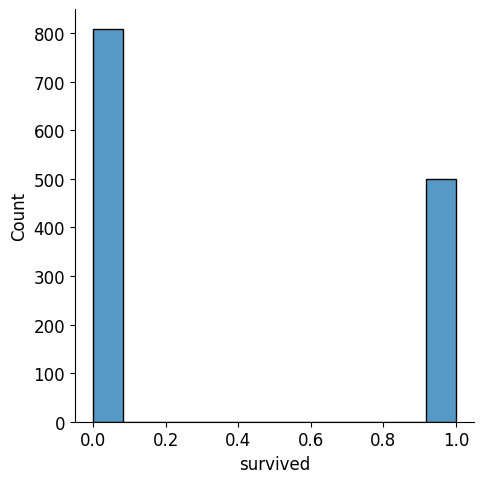

In [7]:
sns.displot(x='survived', data=df)
print("Percentage of passengers that survived: ")
print(str(100* round(df['survived'].sum()/len(df), 2)) + "%")

#Data cleaning


In [8]:
print("Rows containing null:")
print(df.isnull().sum())

Rows containing null:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Here we can see how many fields from each column that are NA. The next step is to give these fields appropriate values.

#Cleaning Age

In [9]:
print("Age rows containing null:")
print(df['age'].isnull().sum())

Age rows containing null:
263


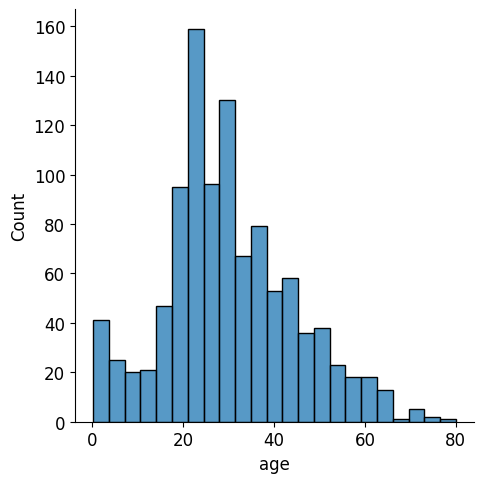

In [10]:
sns.displot(x='age', data=df)

As there are no real outliers, we decided to use the mean age to fill all unknown ages.

In [11]:
meanAge = df['age'].mean()
meanAge

29.8811345124283

In [12]:
df['age'] = df['age'].fillna(meanAge)
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,<NA>,C,<NA>,328,<NA>
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,<NA>,C,<NA>,<NA>,<NA>
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,<NA>,C,<NA>,304,<NA>
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,<NA>,C,<NA>,<NA>,<NA>
1308,3,0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,<NA>,S,<NA>,<NA>,<NA>


Now we set the unknown ages to the mean age of all known passengers

#Cleaning fare

In [13]:
print("Fare rows containing null:")
print(df['fare'].isnull().sum())

Fare rows containing null:
1


We have to decide if we should use the mean or median of all known fare costs.

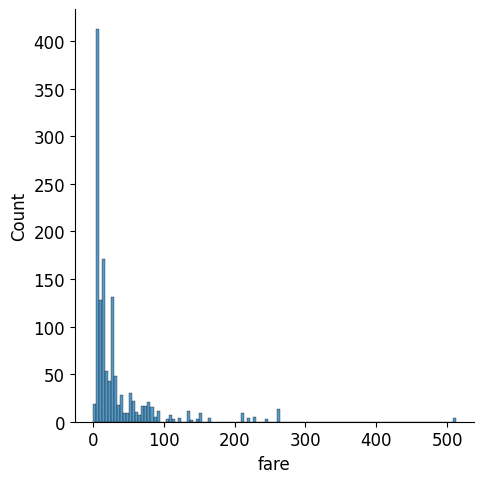

In [14]:
sns.displot(x='fare', data=df)

As there are some outliers, we decide to use the median of fare cost to fill the missing value.

In [15]:
medianFare = df['fare'].median()
medianFare

14.4542

In [16]:
df['fare'] = df['fare'].fillna(medianFare)

#Cleaning Cabin

In [17]:
print("Cabin rows containing null:")
print(df['cabin'].isnull().sum())

Cabin rows containing null:
1014


There is alot of missing values in the cabin column.



In [18]:
print("Cabin names:\n")
print(df['cabin'].value_counts())

Cabin names:

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
F33                4
                  ..
F                  1
F E57              1
F E46              1
A36                1
F38                1
Name: cabin, Length: 186, dtype: Int64


We can see that cabin names appear to be structured with a character followed by numbers. The assumption is that the character represents what type of cabin it is. We then change the cabin column to only include the first character

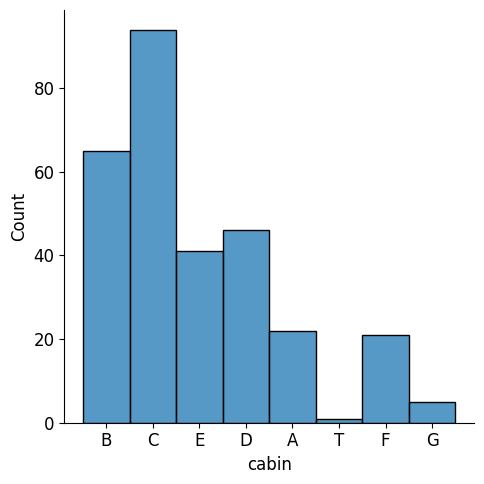

In [19]:
df['cabin'] = df['cabin'].str[0]
sns.displot(x='cabin', data=df)

<Axes: xlabel='cabin', ylabel='survived'>

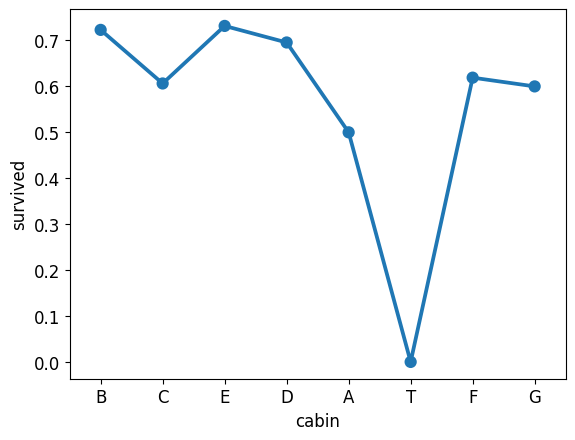

In [20]:
sns.pointplot(x='cabin', y='survived', data=df, errorbar=None)

This plot shows the survival rate of each type of known cabin. Because all these survival rates are higher than they should be (38%), there might be a correlation between the cabin being known and the passenger surviving. Because of this we decide to not include this column in our dataset.

If we were to put all unknown cabins into a "default" cabin, the model might find a correlation between the non "default" cabins and survival rate.

In [21]:
df = df.drop(columns=['cabin'])

#Cleaning Embarked

In [22]:
print("Embarked rows containing null:")
print(df['embarked'].isnull().sum())

Embarked rows containing null:
2


As there are only 2 unknown embarking data, we fill the missing embarked values with the most common embarked location.

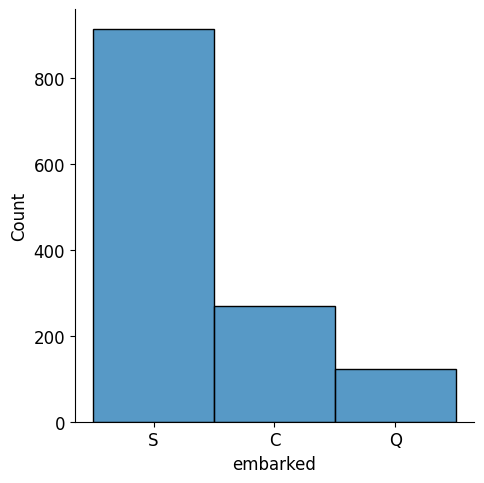

In [23]:
sns.displot(x='embarked', data=df)

The most common embarked location is 'S'.

In [24]:
df['embarked'] = df['embarked'].fillna('S')

#Cleaning boat

In [25]:
print("Boat rows containing null:")
print(df['boat'].isnull().sum())

Boat rows containing null:
823


In [26]:
print("Boat names and survival:\n")
print(df[['boat', 'survived']].value_counts())

Boat names and survival:

boat     survived
13       1           39
C        1           37
15       1           37
14       1           32
4        1           31
10       1           29
5        1           27
3        1           26
11       1           25
9        1           25
8        1           23
7        1           23
16       1           23
6        1           20
D        1           19
12       1           18
2        1           13
B        1            8
A        1            7
1        1            5
A        0            4
13 15    1            2
5 7      1            2
C D      1            2
13 15 B  1            1
8 10     1            1
14       0            1
15 16    1            1
5 9      1            1
B        0            1
C        0            1
12       0            1
D        0            1
dtype: int64


As we can see, only 9 out of 486 died that were on a life boat. This means that this is not a good attribute for predicting surivival, as it is almost guaranteed that someone on a lifeboat survived. We drop this column from the dataset.

In [27]:
df = df.drop(columns=['boat'])

#Cleaning body

In [28]:
print("Body rows containing null:")
print(df['body'].isnull().sum())

Body rows containing null:
1188


As this is the body identification number, this column is not a good attribute for predicting surivival, as it is guaranteed that if the passanger has a body itentification number they are dead. We also drop this column from the dataset.

In [29]:
df = df.drop(columns=['body'])

#Cleaning home destination

In [30]:
print("Home destination rows containing null:")
print(df['home.dest'].isnull().sum())

Home destination rows containing null:
564


In [31]:
print("Home destinations:")
print(df['home.dest'].value_counts())

Home destinations:
New York, NY                        64
London                              14
Montreal, PQ                        10
Paris, France                        9
Cornwall / Akron, OH                 9
                                    ..
Ascot, Berkshire / Rochester, NY     1
Broomfield, Chelmsford, England      1
Co Cork, Ireland Roxbury, MA         1
Barre, Co Washington, VT             1
Antwerp, Belgium / Stanton, OH       1
Name: home.dest, Length: 369, dtype: Int64


Our first thought was to change home destination to the country to get fewer categories. However this was difficult as some values does not have a country, such as "London" and other only have states.

The biggest problem is how we would assign a country to the unknown values. We could not come up with any probable correlation between country and any other data field, so assigning a country to unknown would be difficult.

Because of this we decided to drop the home destination.

In [32]:
df = df.drop(columns=['home.dest'])

#Cleaning name

In [33]:
df['title'] = df['name'].str.extract(r'([A-Za-z]+\.)')
df['title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Ms.            2
Major.         2
Mlle.          2
Capt.          1
Sir.           1
Dona.          1
Jonkheer.      1
Countess.      1
Don.           1
Mme.           1
Lady.          1
Name: title, dtype: Int64

Every passenger has a title in their name. We then extract the title from the name and add a new column called "title".

In [34]:
df = df.drop(columns=['name'])

We assume that the passengers title could make a difference on surivial chance.

<Axes: xlabel='title', ylabel='survived'>

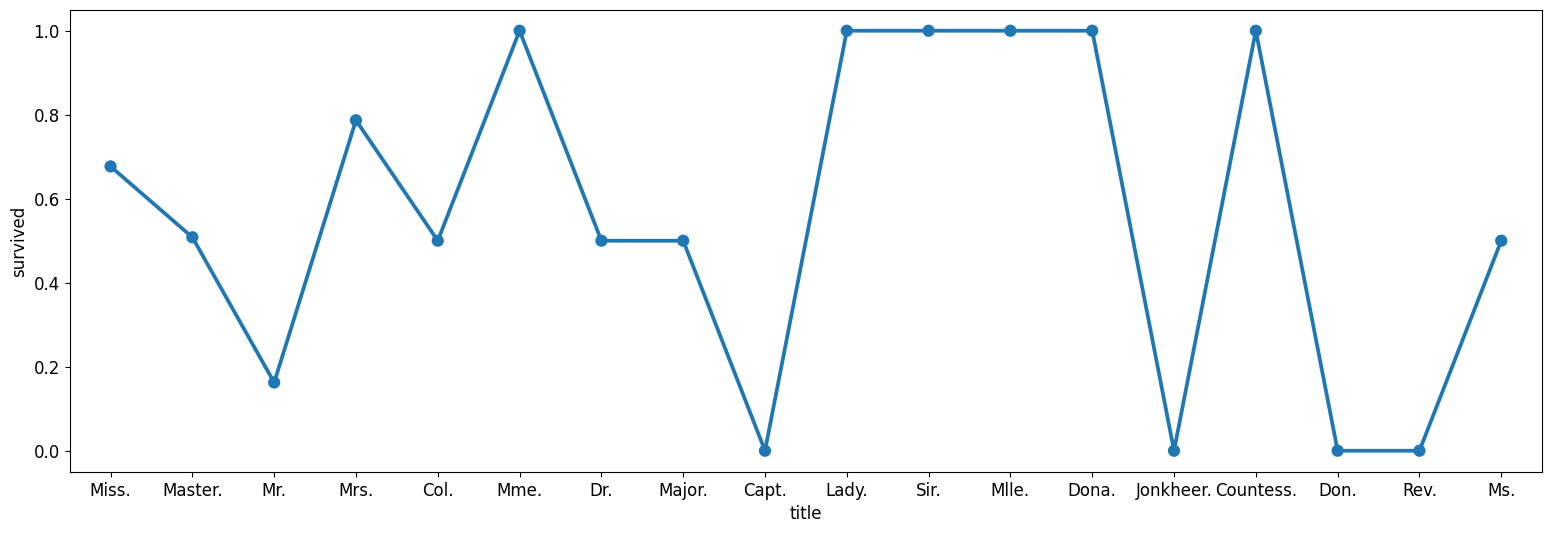

In [35]:
fix, ax = plt.subplots(figsize=(19,6))
sns.pointplot(x='title', y='survived', data=df, errorbar=None, ax=ax)

Here we can see that there are some correlations between title and survivalrate

#Other attributes

The attributes which had complete data are:

pclass                          
sex             
sibsp           
parch           
ticket

To check if we can see if any of these fields guarantee survival/death we decided to plot these columns to check survival rate.


<Axes: xlabel='pclass', ylabel='survived'>

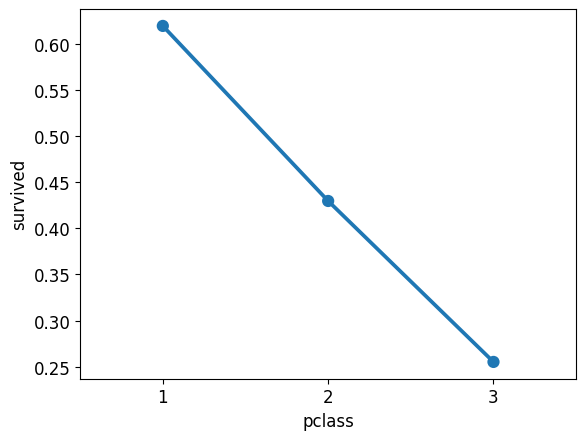

In [36]:
sns.pointplot(x='pclass', y='survived', data=df, errorbar=None)

<Axes: xlabel='sex', ylabel='survived'>

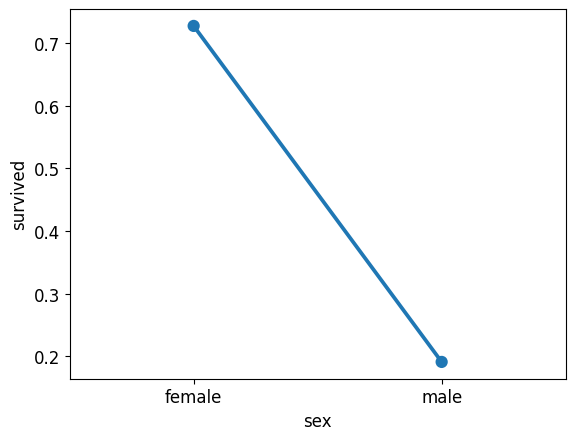

In [37]:
sns.pointplot(x='sex', y='survived', data=df, errorbar=None)

<Axes: xlabel='sibsp', ylabel='survived'>

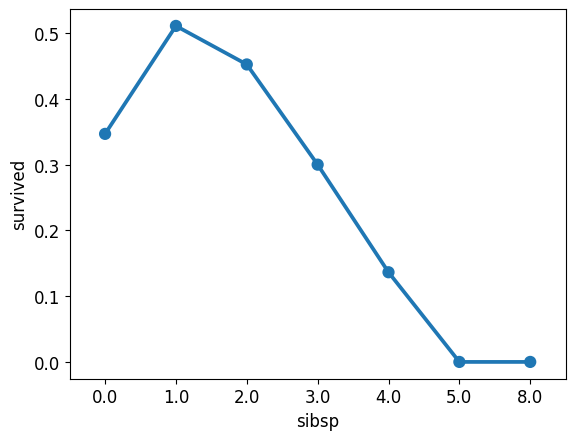

In [38]:
sns.pointplot(x='sibsp', y='survived', data=df, errorbar=None)

<Axes: xlabel='parch', ylabel='survived'>

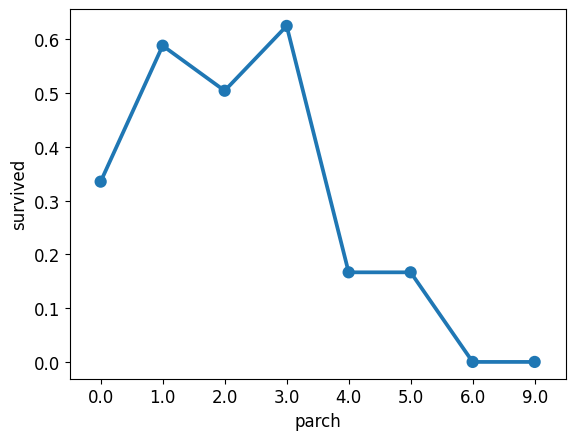

In [39]:
sns.pointplot(x='parch', y='survived', data=df, errorbar=None)

As all these attributes have complete data, and they don't directly imply surivability, we decided to keep them in the dataset.

#Cleaning Survivived

In [40]:
df['survived'] = df['survived'].astype(str)
df['survived'] = df['survived'].replace({'0': 'died', '1': 'survived'})
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,survived,female,29.0000,0.0,0.0,24160,211.3375,S,Miss.
1,1,survived,male,0.9167,1.0,2.0,113781,151.5500,S,Master.
2,1,died,female,2.0000,1.0,2.0,113781,151.5500,S,Miss.
3,1,died,male,30.0000,1.0,2.0,113781,151.5500,S,Mr.
4,1,died,female,25.0000,1.0,2.0,113781,151.5500,S,Mrs.


Here we set the survived column to have "died" or "survived" to make reading plots easier.

In [41]:
print("Rows containing null:")
print(df.isnull().sum())

Rows containing null:
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64


Now the data is cleaned, and we can begin to visualize the data

#Visualizing data
To get an idea of which attributes are important to predict survival, we visialize the data and don't apply normalization so that it is easier to read.

In [ ]:
toNonNormalized = TabularPandas(df, procs=[Categorify],
                                cat_names = ['sex','title', 'ticket', 'embarked', 'pclass'], #Groups
                                cont_names = ['age', 'sibsp', 'parch', 'fare'], #Counts or quantites
                                y_names='survived')

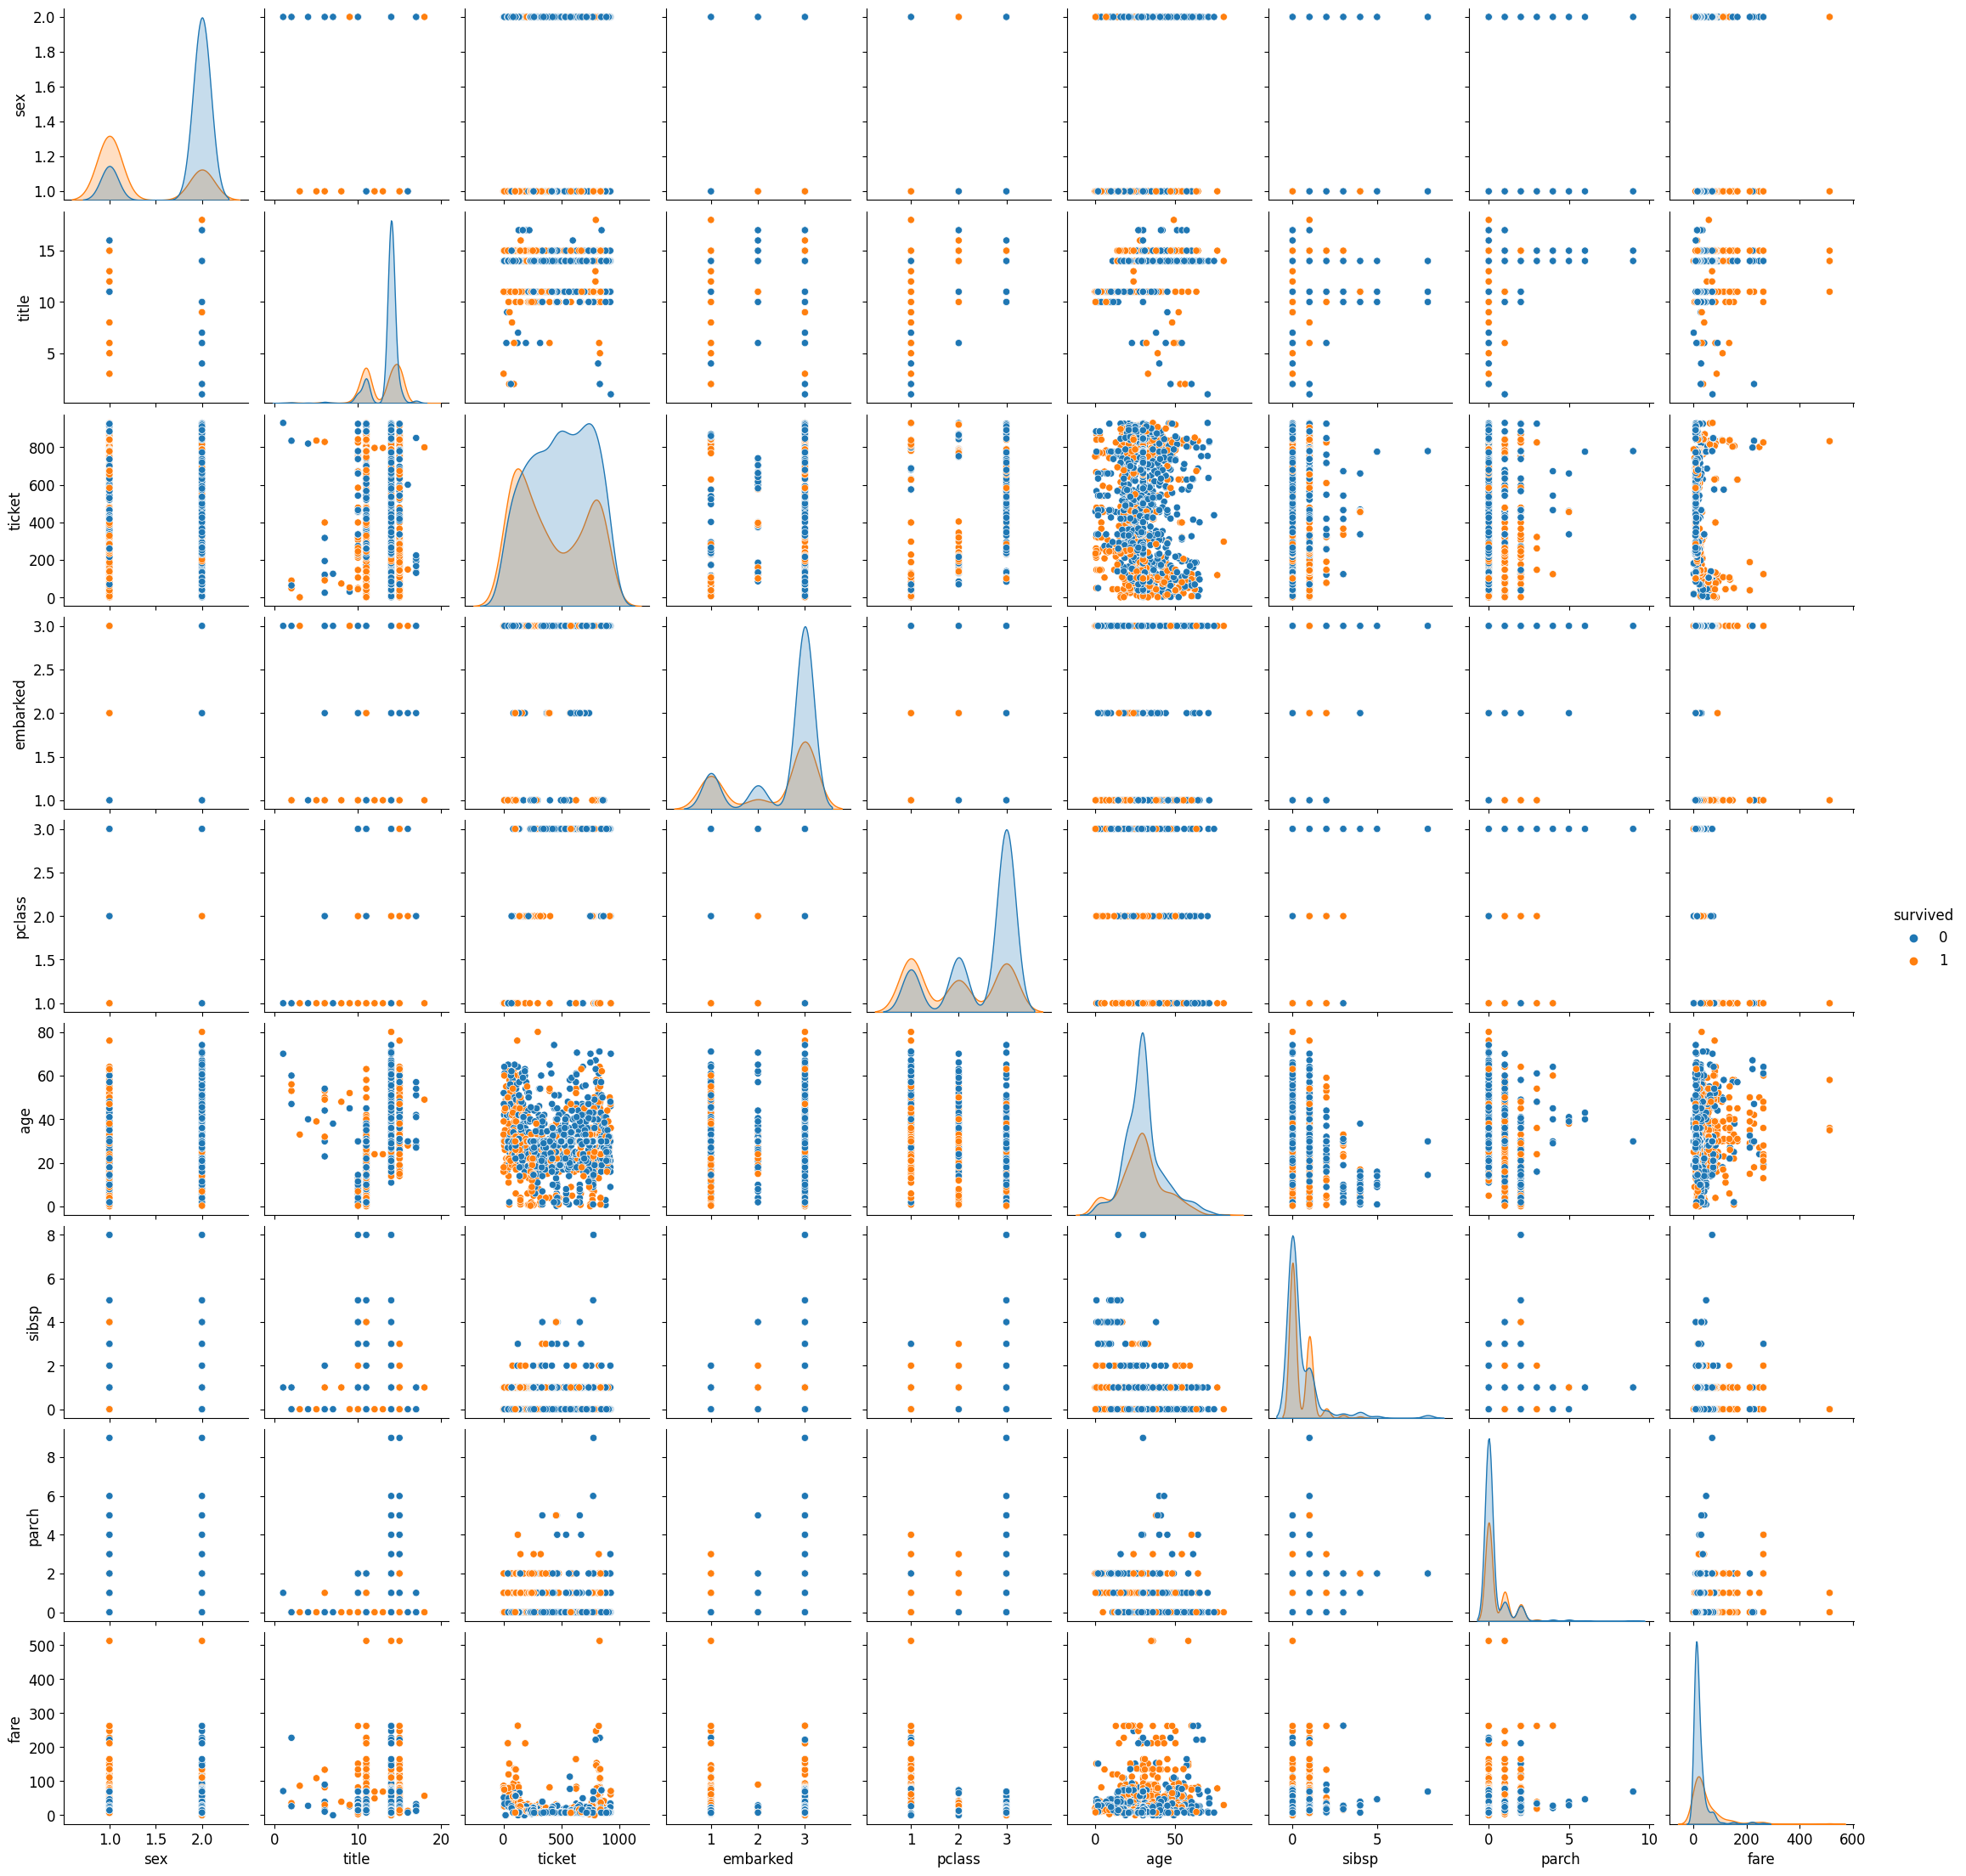

In [ ]:
#This also assigns "survived" as class for each row, 0 if not survived 1 if survived
sns.pairplot(toNonNormalized.xs.iloc[:].assign(survived=toNonNormalized.ys.iloc[:]), hue='survived', kind='scatter')

Because it is pair plot, by looking at the diagonal we can see the individual attributes plotted. Blue are dead and orange are survivors. It is clear that women had a greater chance of survival, and also passengers of lower age (children).

Attributes that might not seem important could end up having some importance for the neural network/tree that we might not see. Because of this we decide to not drop fields that might seem unimportant.

#Baseline

In [42]:
correct = 0
for index, row in df.iterrows():
  survivePred = False
  if(df.loc[index, 'sex'] == 'female'):
    survivePred = True
  if(df.loc[index, 'age'] < 14):
    survivePred = True

  if(df.loc[index, 'survived'] == 'survived'):
    if survivePred:
      correct += 1
  else:
    if not survivePred:
      correct += 1
baseLineAcc = correct/df.shape[0]
print("Accuracy of baseline: " + str(baseLineAcc))

Accuracy of baseline: 0.7822765469824293


We created a baseline that assumes that women and children (passengers under 14) survive.

#Creating the tabular dataframe

In [44]:
splits = RandomSplitter(valid_pct=0.2, seed = 1337)(range_of(df))

to = TabularPandas(df, procs=[Categorify],
                    cat_names = ['sex','title', 'ticket', 'embarked', 'pclass'], #Groups
                   cont_names = ['age', 'sibsp', 'parch', 'fare'], #continous, quantities or counts
                   y_names='survived',
                   splits=splits)
to.xs.iloc[:]

,sex,title,ticket,embarked,pclass,age,sibsp,parch,fare
577,1,10,657,3,2,31.000000,0.0,0.0,21.000000
279,2,13,34,3,1,62.000000,0.0,0.0,26.549999
105,1,10,673,1,1,36.000000,0.0,0.0,31.679199
943,1,10,567,3,3,37.000000,0.0,0.0,9.587500
1015,2,13,594,3,3,55.500000,0.0,0.0,8.050000
...,...,...,...,...,...,...,...,...,...
1002,1,10,512,2,3,29.881134,2.0,0.0,23.250000
125,2,13,0,3,1,29.881134,0.0,0.0,0.000000
178,1,14,63,3,1,45.000000,1.0,0.0,52.554199
181,1,5,0,3,1,49.000000,0.0,0.0,25.929199


We then create a Tabular dataframe that is used for plotting and training the models

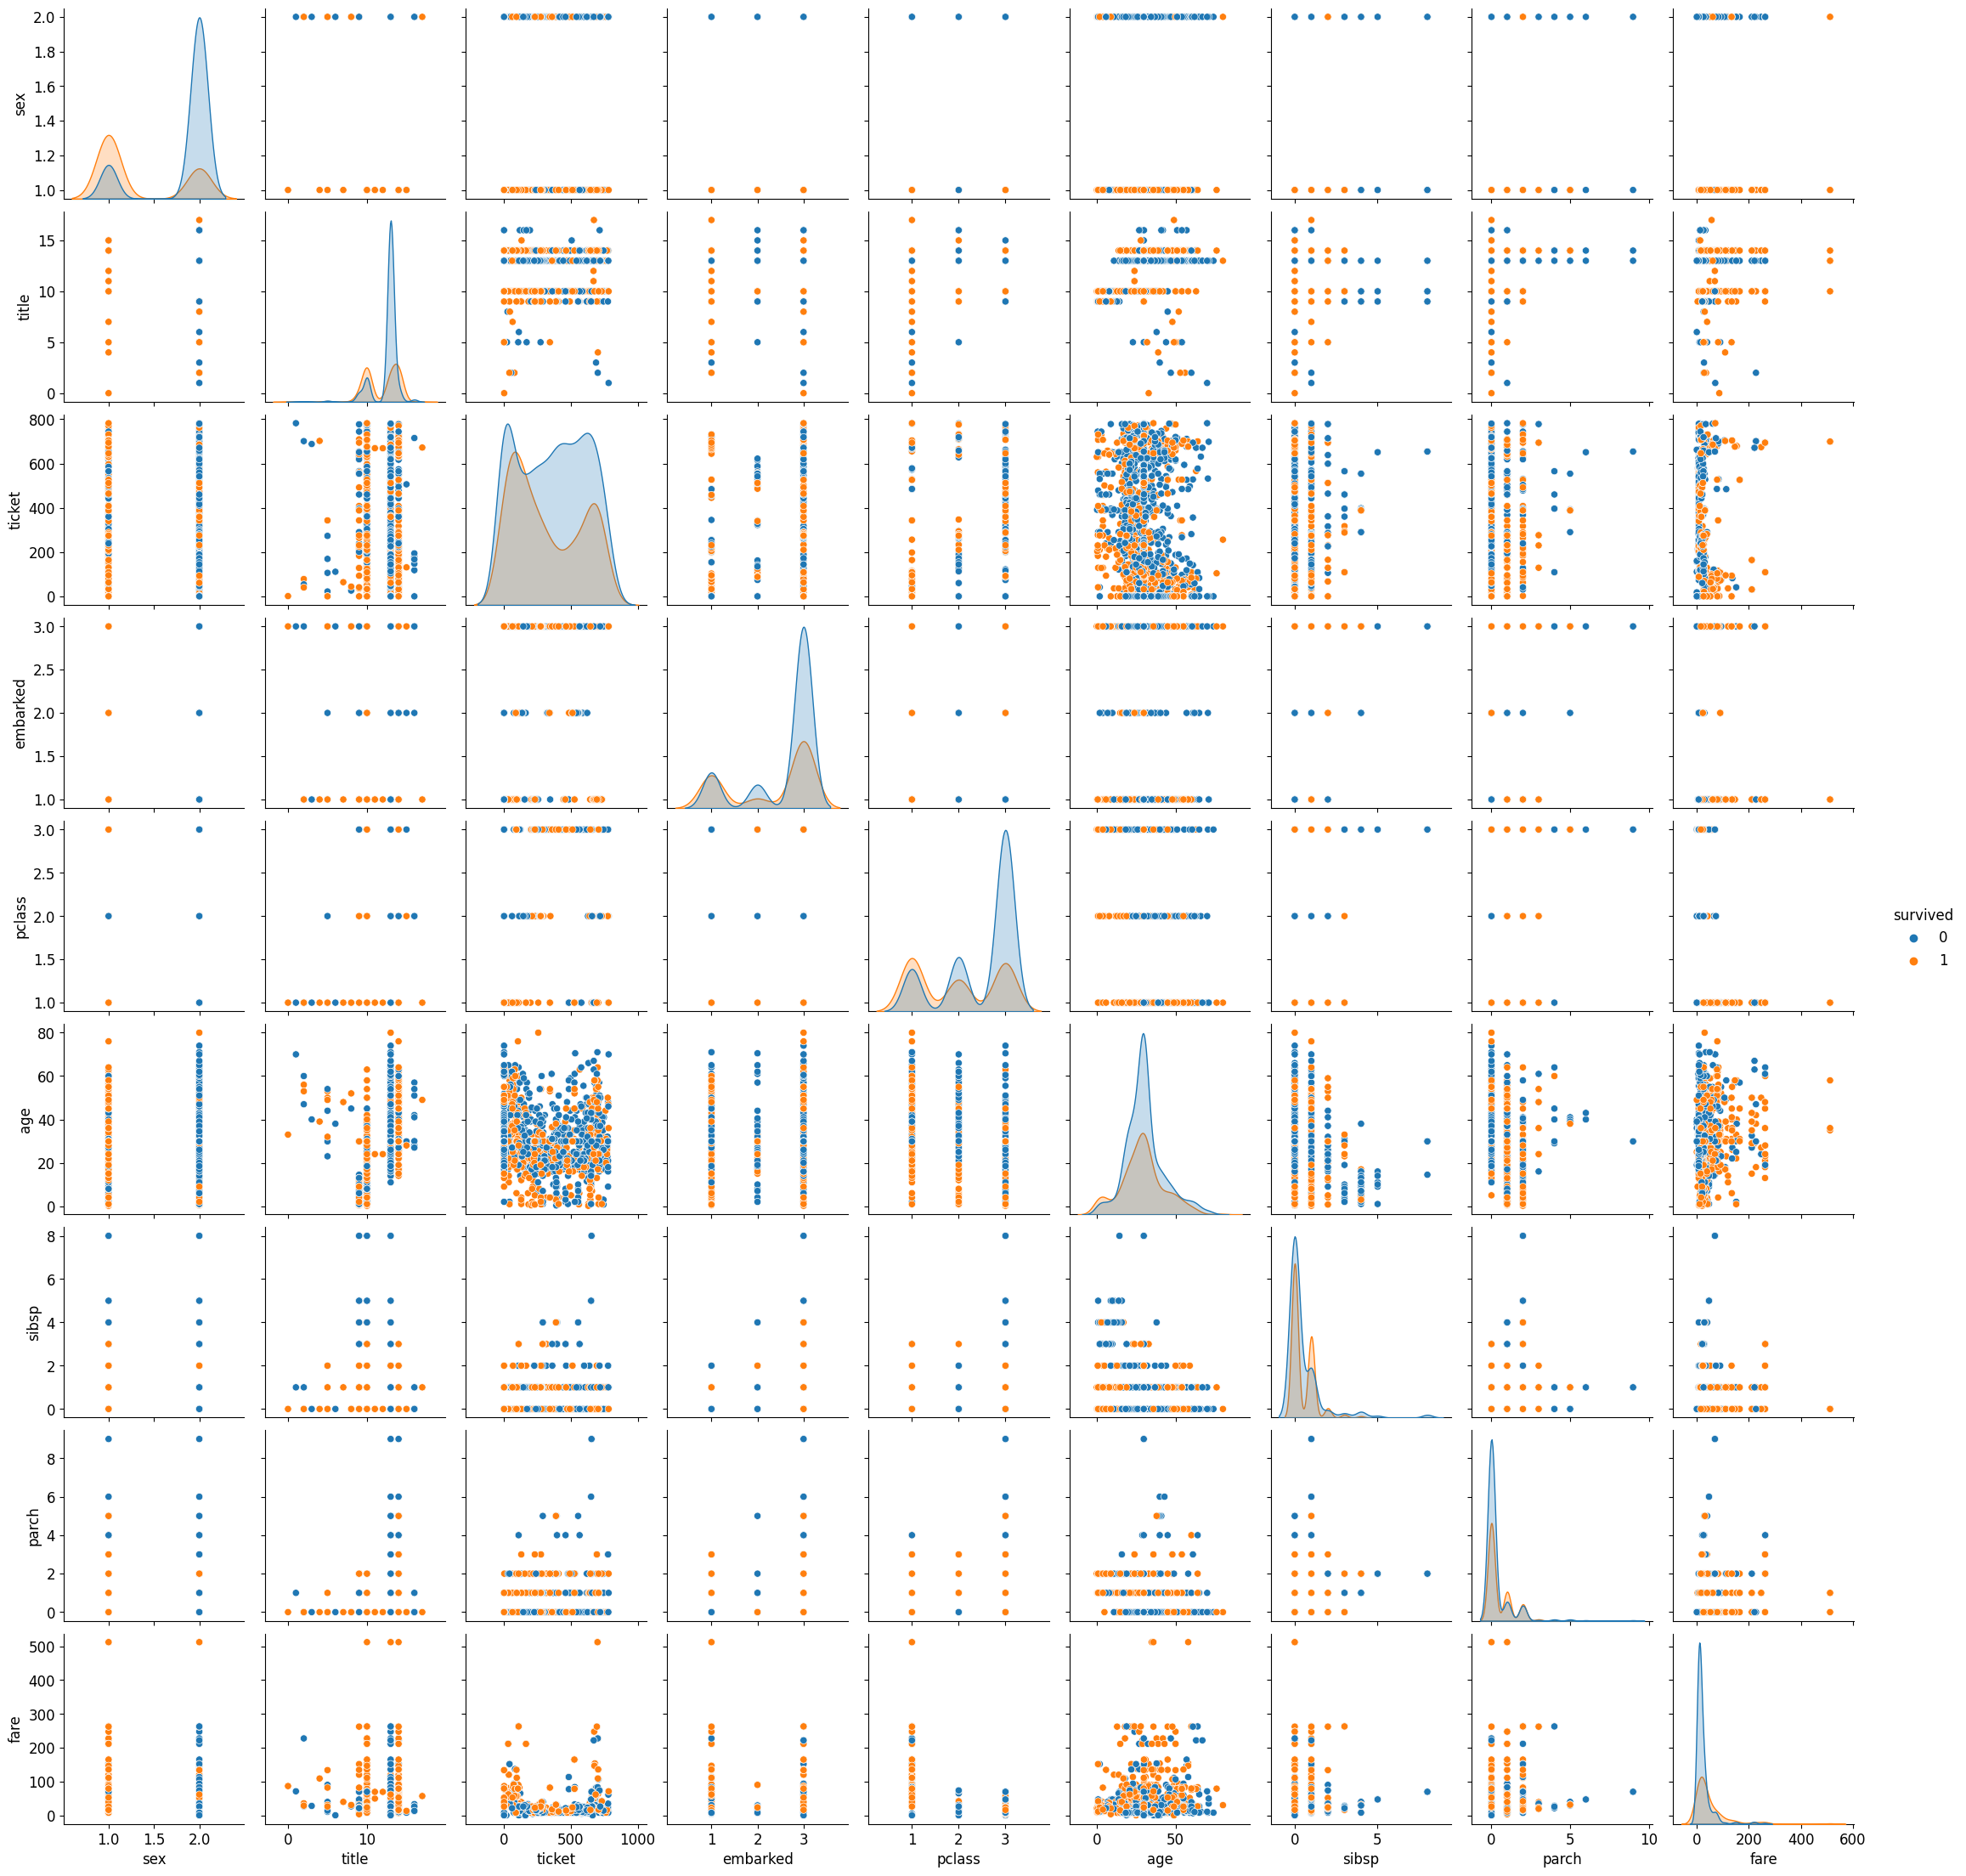

In [45]:
#This also assigns "survived" as class for each row, 0 if not survived 1 if survived
sns.pairplot(to.xs.iloc[:].assign(survived=to.ys.iloc[:]), hue='survived', kind='scatter')

#Creating and training the Decision Tree

In [46]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_valid, y_valid = to.valid.xs, to.valid.ys.values.ravel()
X_train

,sex,title,ticket,embarked,pclass,age,sibsp,parch,fare
577,1,10,657,3,2,31.000000,0.0,0.0,21.000000
279,2,13,34,3,1,62.000000,0.0,0.0,26.549999
105,1,10,673,1,1,36.000000,0.0,0.0,31.679199
943,1,10,567,3,3,37.000000,0.0,0.0,9.587500
1015,2,13,594,3,3,55.500000,0.0,0.0,8.050000
...,...,...,...,...,...,...,...,...,...
64,2,13,58,3,1,27.000000,1.0,0.0,53.099998
129,1,10,31,1,1,35.000000,0.0,0.0,211.500000
123,2,13,84,1,1,60.000000,1.0,1.0,79.199997
1186,2,13,226,1,3,29.881134,2.0,0.0,21.679199


Now we get the training and validation sets from the tabular dataframe

[Text(0.359375, 0.9166666666666666, 'sex <= 1.5\ngini = 0.475\nsamples = 1048\nvalue = [641, 407]\nclass = died'),
 Text(0.125, 0.75, 'pclass <= 2.5\ngini = 0.394\nsamples = 370\nvalue = [100, 270]\nclass = survived'),
 Text(0.0625, 0.5833333333333334, 'gini = 0.13\nsamples = 200\nvalue = [14, 186]\nclass = survived'),
 Text(0.1875, 0.5833333333333334, 'fare <= 23.35\ngini = 0.5\nsamples = 170\nvalue = [86, 84]\nclass = died'),
 Text(0.125, 0.4166666666666667, 'ticket <= 223.0\ngini = 0.488\nsamples = 142\nvalue = [60, 82]\nclass = survived'),
 Text(0.0625, 0.25, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]\nclass = survived'),
 Text(0.1875, 0.25, 'gini = 0.496\nsamples = 130\nvalue = [59, 71]\nclass = survived'),
 Text(0.25, 0.4166666666666667, 'gini = 0.133\nsamples = 28\nvalue = [26, 2]\nclass = died'),
 Text(0.59375, 0.75, 'age <= 8.5\ngini = 0.322\nsamples = 678\nvalue = [541, 137]\nclass = died'),
 Text(0.4375, 0.5833333333333334, 'sibsp <= 2.5\ngini = 0.489\nsamples = 33\nvalue 

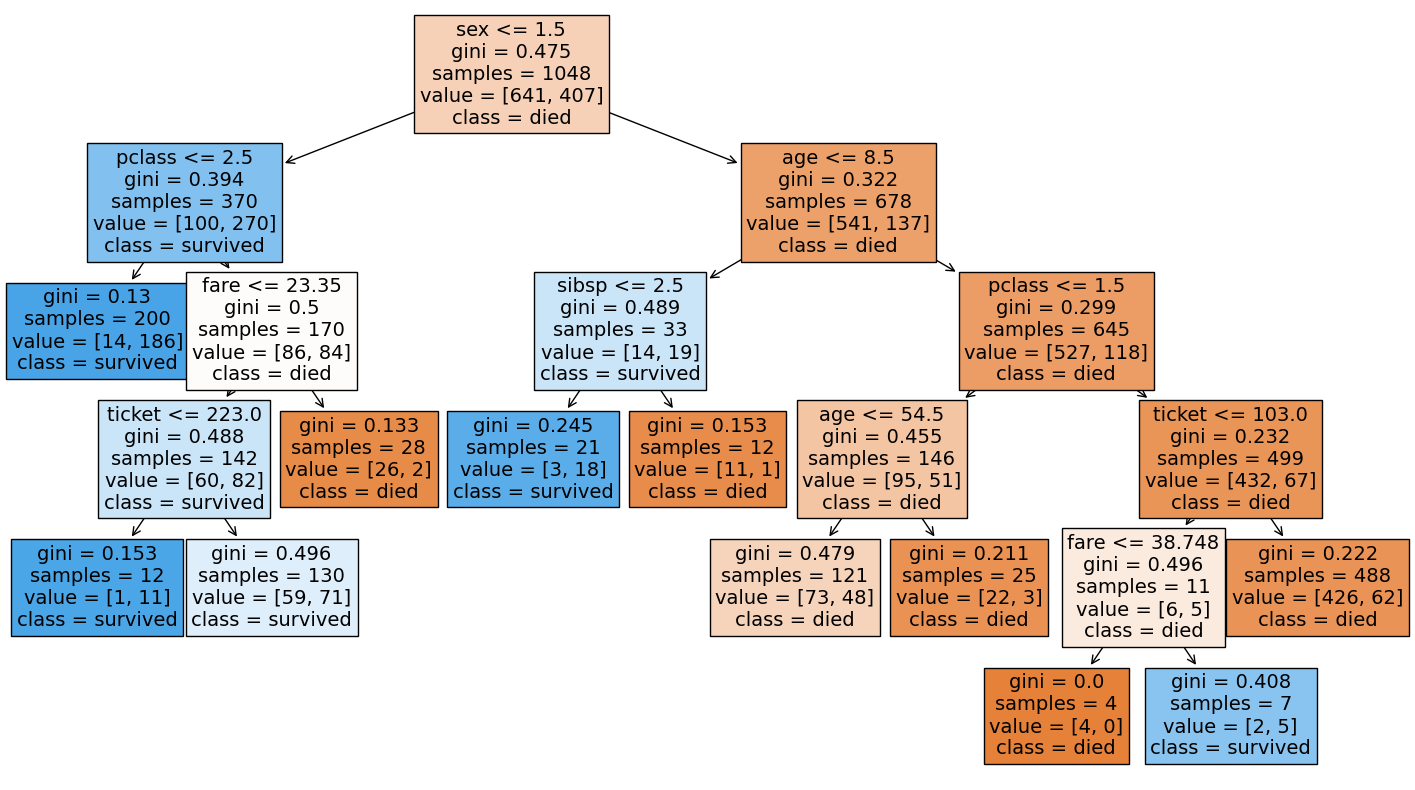

In [71]:
clf = DecisionTreeClassifier(max_leaf_nodes=11, random_state=0)
clf.fit(X_train, y_train)

plt.figure(figsize=(18,10))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=14, feature_names=to.x_names, class_names=to.vocab, filled=True)

Here we create and train the decision tree and get a nice plot of the decision it takes. This is one of the advantages of decision trees compared to neural networks, you get a much better understanding of how the model operates.

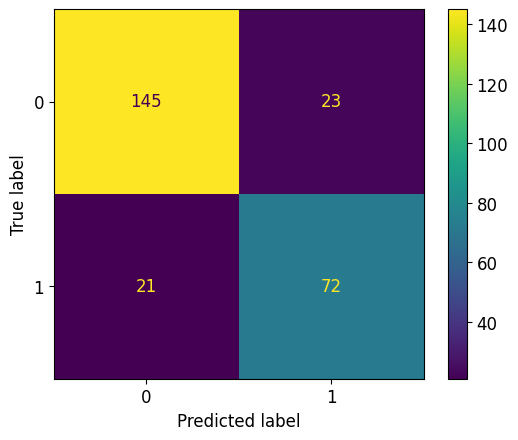

In [72]:
#Test model on validation set
ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid)

Now we test the decision tree model on the validation set and get this confusion matrix that displays the results.

In [74]:
treeAccuracy = accuracy_score(clf.predict(X_valid), y_valid)
print("Baseline accuracy: " + str(baseLineAcc))
print("Accuracy of tree: " + str(treeAccuracy))
print("Increased accuracy by " + str(round(100*(treeAccuracy - baseLineAcc), 2)) + "% compared to baseline")

Baseline accuracy: 0.7822765469824293
Accuracy of tree: 0.8314176245210728
Increased accuracy by 4.91% compared to baseline


In [75]:
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns) #list(zip(X_train.columns, clf.feature_importances_))
feature_importance

sex         0.604336
title       0.000000
ticket      0.024137
embarked    0.000000
pclass      0.205674
age         0.058308
sibsp       0.041462
parch       0.000000
fare        0.066083
dtype: float64

Now we can see which attributes are the most important to the decision tree.

<Axes: >

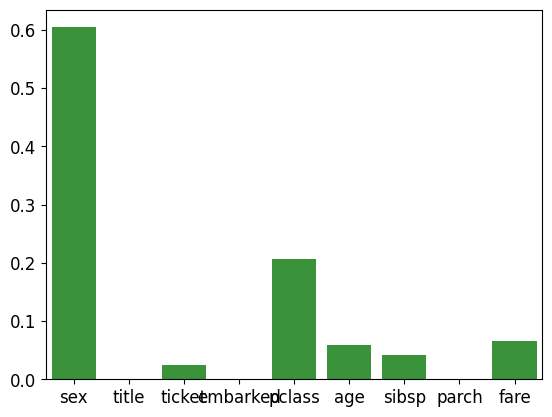

In [76]:
sns.barplot(x=X_train.columns, y=clf.feature_importances_, color='C2')

#Creating and training the Random forest

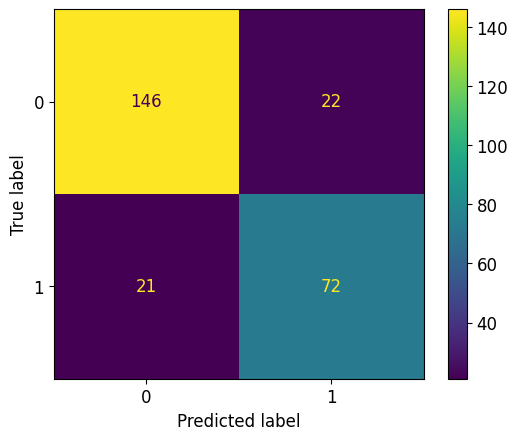

In [77]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
rf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_valid, y_valid)

With these few lines we create a random forest, train it and then display the confusion matrix. We reuse the same training and validation sets we used before on the decision tree classifier.

In [78]:
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns) #list(zip(X_train.columns, clf.feature_importances_))
feature_importance

sex         0.367227
title       0.171421
ticket      0.094765
embarked    0.021419
pclass      0.108217
age         0.063094
sibsp       0.034556
parch       0.026958
fare        0.112344
dtype: float64

As we can see here, all attributes have some importance. This is because of how random forests operate with bagging.

<Axes: >

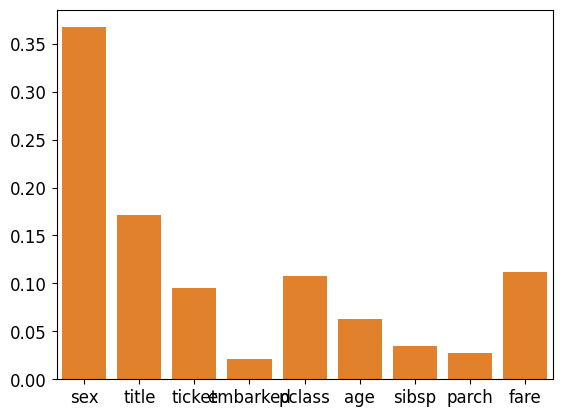

In [79]:
sns.barplot(x=X_train.columns, y=rf.feature_importances_, color='C1')

In [80]:
forestAccuracy = accuracy_score(rf.predict(X_valid), y_valid)
print("Baseline accuracy: " + str(baseLineAcc))
print("Accuracy of tree: " + str(treeAccuracy))
print("Accuracy of forest: " + str(forestAccuracy))
print("Increased accuracy by " + str(round(100*(forestAccuracy - baseLineAcc), 2)) + "% compared to baseline")
print("Increased accuracy by " + str(round(100*(forestAccuracy - treeAccuracy), 2)) + "% compared to tree")

Baseline accuracy: 0.7822765469824293
Accuracy of tree: 0.8314176245210728
Accuracy of forest: 0.8352490421455939
Increased accuracy by 5.3% compared to baseline
Increased accuracy by 0.38% compared to tree


#Neural Network

In [84]:
dls = to.dataloaders(bs=8)
dls.show_batch()

,sex,title,ticket,embarked,pclass,age,sibsp,parch,fare,survived
0,male,Mr.,11765,C,1,25.000000,1.0,0.0,55.441700,survived
1,male,Mr.,1601,S,3,29.881134,0.0,0.0,56.495800,survived
2,male,Mr.,233734,Q,2,35.000000,0.0,0.0,12.350000,died
3,female,Miss.,24160,S,1,15.000000,0.0,1.0,211.337494,survived
4,male,Mr.,C 17369,S,3,24.000000,0.0,0.0,7.141700,survived
5,male,Col.,113800,S,1,60.000000,0.0,0.0,26.549999,died
6,female,Miss.,CA 2144,S,3,16.000000,5.0,2.0,46.900002,died
7,male,Mr.,7935,Q,3,29.881134,0.0,0.0,7.750000,died


In [95]:
learn = tabular_learner(dls, metrics=accuracy, layers=[1])

In [96]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.979283,0.915337,0.501916,00:01
1,0.786945,0.572526,0.708812,00:01
2,0.563775,0.504168,0.781609,00:01
3,0.450614,0.534655,0.754789,00:01
4,0.358444,0.446494,0.823755,00:01
5,0.265962,0.397423,0.839080,00:01
6,0.210386,0.377636,0.835249,00:01
7,0.172007,0.383148,0.850575,00:01
8,0.201234,0.437494,0.835249,00:01
9,0.169937,0.382967,0.842912,00:01


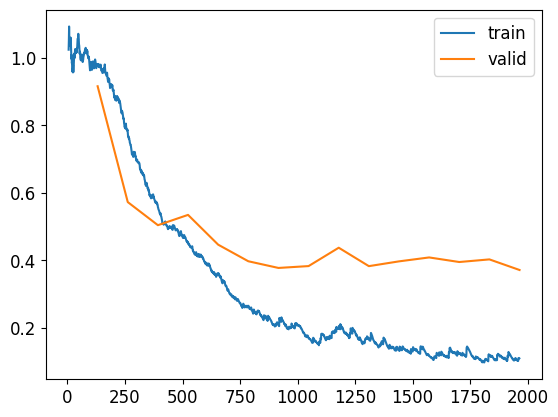

In [97]:
learn.recorder.plot_loss()

In [98]:
learn.show_results()

,sex,title,ticket,embarked,pclass,age,sibsp,parch,fare,survived,survived_pred
0,2.0,13.0,126.0,3.0,2.0,27.000000,1.0,0.0,26.000000,0.0,0.0
1,2.0,13.0,0.0,3.0,3.0,24.000000,0.0,0.0,7.775000,0.0,0.0
2,2.0,13.0,443.0,3.0,3.0,25.000000,1.0,0.0,17.799999,0.0,0.0
3,1.0,14.0,245.0,1.0,3.0,29.881134,1.0,0.0,14.458300,0.0,1.0
4,2.0,5.0,0.0,3.0,1.0,50.000000,2.0,0.0,133.649994,1.0,0.0
5,2.0,13.0,0.0,3.0,2.0,23.000000,0.0,0.0,13.000000,0.0,0.0
6,2.0,13.0,0.0,3.0,2.0,26.000000,0.0,0.0,13.000000,0.0,0.0
7,1.0,10.0,534.0,2.0,3.0,29.881134,1.0,0.0,15.500000,0.0,1.0


              precision    recall  f1-score   support

        died       0.89      0.88      0.89       168
    survived       0.79      0.81      0.80        93

    accuracy                           0.85       261
   macro avg       0.84      0.84      0.84       261
weighted avg       0.86      0.85      0.85       261



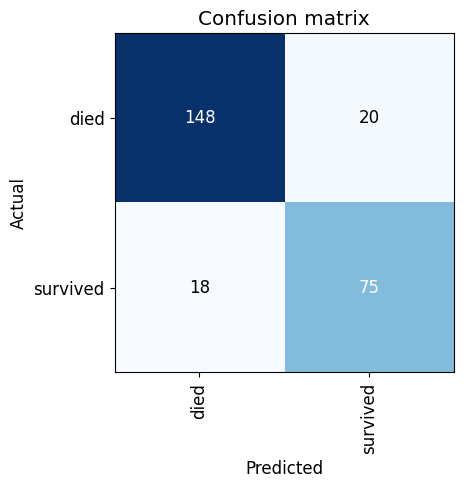

In [99]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.print_classification_report()

In [101]:
nNAccuracy = learn.validate()[1]
print("Baseline accuracy: " + str(baseLineAcc))
print("Accuracy of tree: " + str(treeAccuracy))
print("Accuracy of forest: " + str(forestAccuracy))
print("Accuracy of neural network: " + str(nNAccuracy))
print("Increased accuracy by " + str(round(100*(nNAccuracy - baseLineAcc), 2)) + "% compared to baseline")
print("Increased accuracy by " + str(round(100*(nNAccuracy - treeAccuracy), 2)) + "% compared to tree")
print("Increased accuracy by " + str(round(100*(nNAccuracy - forestAccuracy), 2)) + "% compared to forest")

Baseline accuracy: 0.7822765469824293
Accuracy of tree: 0.8314176245210728
Accuracy of forest: 0.8352490421455939
Accuracy of neural network: 0.8544061183929443
Increased accuracy by 7.21% compared to baseline
Increased accuracy by 2.3% compared to tree
Increased accuracy by 1.92% compared to forest
